### Text to image

In [1]:
import requests
import json

host = "http://127.0.0.1:8888"

def text2img(params: dict) -> dict:
    """
    Vincentian picture
    """
    result = requests.post(
        url=f"{host}/v1/generation/text-to-image",
        data=json.dumps(params),
        headers={
            "Content-Type": "application/json",
            "Accept": "application/json" # or "image/png" for a binary image
            })
    return result.json()

result =text2img({
    "prompt": "1girl sitting on the ground",
    "async_process": True  # Set False to wait for the result
    })
print(result)

{'task_id': 'bb794b2f-381c-4cb6-bdc7-19e6290822ea', 'task_type': None, 'req_param': {'prompt': '1girl sitting on the ground', 'negative_prompt': '', 'style_selections': ['Fooocus V2', 'Fooocus Enhance', 'Fooocus Sharp'], 'performance_selection': 'Speed', 'aspect_ratios_selection': '1152*896', 'image_number': 1, 'image_seed': -1, 'sharpness': 2.0, 'guidance_scale': 4.0, 'base_model_name': 'juggernautXL_v8Rundiffusion.safetensors', 'refiner_model_name': 'None', 'refiner_switch': 0.5, 'loras': [{'model_name': 'sd_xl_offset_example-lora_1.0.safetensors', 'weight': 0.1}], 'advanced_params': {'disable_preview': False, 'adm_scaler_positive': 1.5, 'adm_scaler_negative': 0.8, 'adm_scaler_end': 0.3, 'refiner_swap_method': 'joint', 'adaptive_cfg': 7.0, 'sampler_name': 'dpmpp_2m_sde_gpu', 'scheduler_name': 'karras', 'overwrite_step': -1, 'overwrite_switch': -1, 'overwrite_width': -1, 'overwrite_height': -1, 'overwrite_vary_strength': -1.0, 'overwrite_upscale_strength': -1.0, 'mixing_image_prompt_a

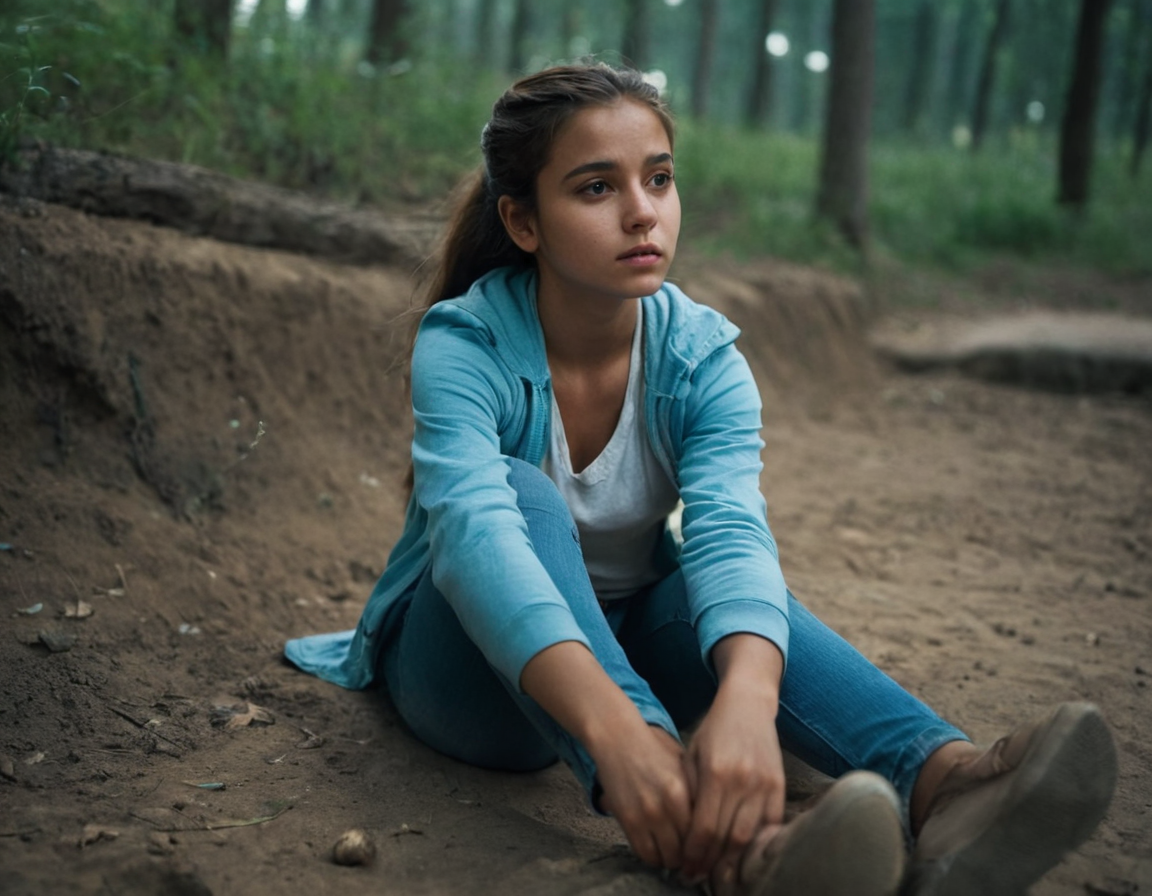

In [5]:
import requests
import json
from IPython.display import Image

host = "http://127.0.0.1:8888"

def text2img(params: dict) -> dict:
    """
    Vincentian picture
    """
    result = requests.post(
        url=f"{host}/v1/generation/text-to-image",
        data=json.dumps(params),
        headers={
            "Content-Type": "application/json",
            "Accept": "image/png"  # async_process will be ignored
        })
    return result

result =text2img({
    "prompt": "1girl sitting on the ground",
    "async_process": True  # Set to False to wait for the result
    })
Image(result.content)

### upscale or vary

In [1]:
import requests


# upscale or vary v1 Interface example
# also you can pass headers params in the request to get a raw picture
host = "http://127.0.0.1:8888"
image = open("./imgs/bear.jpg", "rb").read()

def upscale_vary(image, params: dict) -> dict:
    """
    Upscale or Vary
    """
    response = requests.post(
        url=f"{host}/v1/generation/image-upscale-vary",
        data=params,
        files={"input_image": image})
    return response.json()

result =upscale_vary(
    image=image,
    params={
        "uov_method": "Upscale (2x)",
        "async_process": True
    })
print(result)

{'task_id': '7afbd0c6-f7f1-40dd-b2ad-c5ffc13a9bd5', 'task_type': None, 'req_param': {'prompt': '', 'negative_prompt': '', 'style_selections': ['Fooocus V2', 'Fooocus Enhance', 'Fooocus Sharp'], 'performance_selection': 'Speed', 'aspect_ratios_selection': '1152*896', 'image_number': 1, 'image_seed': -1, 'sharpness': 2.0, 'guidance_scale': 4.0, 'base_model_name': 'juggernautXL_v8Rundiffusion.safetensors', 'refiner_model_name': 'None', 'refiner_switch': 0.5, 'loras': [{'model_name': 'sd_xl_offset_example-lora_1.0.safetensors', 'weight': 0.1}], 'advanced_params': None, 'require_base64': False, 'async_process': True, 'webhook_url': '', 'input_image': None, 'uov_method': 'Upscale (2x)', 'upscale_value': None}, 'in_queue_millis': 1710428047434, 'start_millis': 0, 'finish_millis': 0, 'status': 'pending', 'task_status': None, 'progress': 0, 'task_step_preview': None, 'webhook_url': None, 'task_result': []}


### inpaint or outpaint

In [2]:
import requests
import json


# Extend your image, here I will show you how to process a sync task
# for default, require_base64 is False, so, task_result will be like this:
# [{'base64': None, 'url': 'http://127.0.0.1:8888/files/2024-03-14/81eb6ad9-c71f-4ce9-bdd3-4ea2d85ab6f0-0.png', 'seed': '2431223215012093563', 'finish_reason': 'SUCCESS'}]
# if you want to get the base64 image, you can set require_base64 to True
host = "http://127.0.0.1:8888"
image = open("./imgs/bear.jpg", "rb").read()

def inpaint_outpaint(params: dict, input_image: bytes, input_mask: bytes = None) -> dict:
    """
    Partial redraw v1 interface example
    """
    response = requests.post(
      url=f"{host}/v1/generation/image-inpaint-outpaint",
      data=params,
      files={
        "input_image": input_image,
        "input_mask": input_mask})
    return response.json()


result = inpaint_outpaint(
    params={
      "outpaint_selections": "Left,Right",
      "async_process": False
      },
    input_image=image,
    input_mask=None)
print(result)

{'task_id': '81eb6ad9-c71f-4ce9-bdd3-4ea2d85ab6f0', 'task_type': 'Image Inpaint or Outpaint', 'req_param': {'prompt': '', 'negative_prompt': '', 'style_selections': ['Fooocus Enhance', 'Fooocus Sharp'], 'performance_selection': 'Speed', 'aspect_ratios_selection': '1152*896', 'image_number': 1, 'image_seed': None, 'sharpness': 2.0, 'guidance_scale': 4.0, 'base_model_name': 'juggernautXL_v8Rundiffusion.safetensors', 'refiner_model_name': 'None', 'refiner_switch': 0.5, 'loras': [{'model_name': 'sd_xl_offset_example-lora_1.0.safetensors', 'weight': 0.1}], 'advanced_params': None, 'require_base64': False, 'async_process': False, 'webhook_url': '', 'input_image': None, 'input_mask': None, 'inpaint_additional_prompt': None, 'outpaint_selections': ['Left', 'Right'], 'outpaint_distance_left': 0, 'outpaint_distance_right': 0, 'outpaint_distance_top': 0, 'outpaint_distance_bottom': 0}, 'in_queue_millis': 1710428895200, 'start_millis': 1710428895569, 'finish_millis': 1710428930754, 'status': 'comp

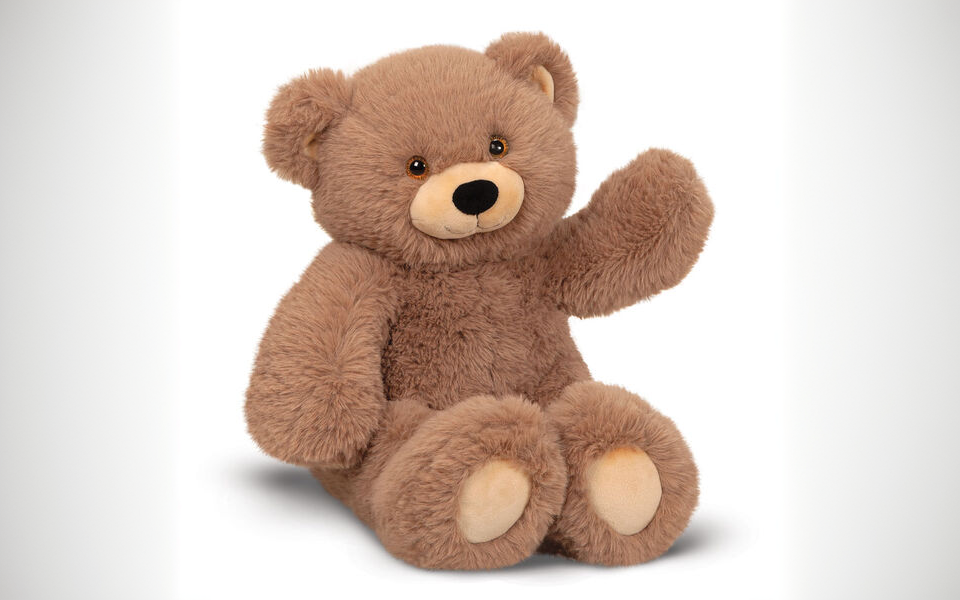

In [3]:
import requests
from IPython.display import Image


# here is the result
result = requests.get(result['task_result'][0]['url'])
Image(result.content)

In [ ]:
#Partial redraw example
source = open("./imgs/s.jpg", "rb").read()
mask = open("./imgs/m.png", "rb").read()
result = inpaint_outpaint(params={
                            "prompt": "a cat",
                            "async_process": True},
                          input_image=source,
                          input_mask=mask)
print(json.dumps(result, indent=4, ensure_ascii=False))

In [ ]:
import requests
import json
import base64


# Partial redraw v2 interface example
host = "http://127.0.0.1:8888"
image = open("./imgs/bear.jpg", "rb").read()

def inpaint_outpaint(params: dict) -> dict:
    """
    Partial redraw v2 interface example
    """
    response = requests.post(url=f"{host}/v2/generation/image-inpaint-outpaint",
                        data=json.dumps(params),
                        headers={"Content-Type": "application/json"})
    return response.json()

# Image extension example
result = inpaint_outpaint(params={
                            "input_image": base64.b64encode(image).decode('utf-8'),
                            "input_mask": None,
                            "outpaint_selections": ["Left", "Right"],
                            "async_process": True})
print(json.dumps(result, indent=4, ensure_ascii=False))

In [ ]:
# Partial redraw example
source = open("./imgs/s.jpg", "rb").read()
mask = open("./imgs/m.png", "rb").read()
result = inpaint_outpaint(params={
                            "prompt": "a cat",
                            "input_image": base64.b64encode(source).decode('utf-8'),
                            "input_mask": base64.b64encode(mask).decode('utf-8'),
                            "async_process": True})
print(json.dumps(result, indent=4, ensure_ascii=False))

# image prompts

In [ ]:
import requests
import json


# image_prompt v1 Interface example
host = "http://127.0.0.1:8888"
image = open("./imgs/bear.jpg", "rb").read()
source = open("./imgs/s.jpg", "rb").read()
mask = open("./imgs/m.png", "rb").read()

def image_prompt(params: dict,
                 input_image: bytes=None,
                 input_mask: bytes=None,
                 cn_img1: bytes=None,
                 cn_img2: bytes=None,
                 cn_img3: bytes=None,
                 cn_img4: bytes=None,) -> dict:
    """
    image prompt
    """
    response = requests.post(url=f"{host}/v1/generation/image-prompt",
                             data=params,
                             files={
                                 "input_image": input_image,
                                 "input_mask": input_mask,
                                 "cn_img1": cn_img1,
                                 "cn_img2": cn_img2,
                                 "cn_img3": cn_img3,
                                 "cn_img4": cn_img4,
                              })
    return response.json()

# image extension
params = {
    "outpaint_selections": ["Left", "Right"],
    "image_prompts": [] # Required parameters, can be an empty list
}
result = image_prompt(params=params, input_iamge=image)
print(json.dumps(result, indent=4, ensure_ascii=False))

In [ ]:
# partial redraw

params = {
    "prompt": "1girl sitting on the chair",
    "image_prompts": [], # Required parameters, can be an empty list
    "async_process": True
}
result = image_prompt(params=params, input_iamge=source, input_mask=mask)
print(json.dumps(result, indent=4, ensure_ascii=False))

In [ ]:
# image prompt

params = {
    "prompt": "1girl sitting on the chair",
    "image_prompts": [
        {
            "cn_stop": 0.6,
            "cn_weight": 0.6,
            "cn_type": "ImagePrompt"
        },{
            "cn_stop": 0.6,
            "cn_weight": 0.6,
            "cn_type": "ImagePrompt"
        }]
    }
result = image_prompt(params=params, cn_img1=image, cn_img2=source)
print(json.dumps(result, indent=4, ensure_ascii=False))

In [ ]:
import requests
import json
import base64

# image_prompt v2 Interface example
host = "http://127.0.0.1:8888"
image = open("./imgs/image_prompt-2.png", "rb").read()
source = open("./imgs/source.jpg", "rb").read()
mask = open("./imgs/mask.png", "rb").read()

def image_prompt(params: dict) -> dict:
    """
    image prompt
    """
    response = requests.post(url=f"{host}/v2/generation/image-prompt",
                             data=json.dumps(params),
                             headers={"Content-Type": "application/json"})
    return response.json()

# image extension
params = {
    "input_image": base64.b64encode(image).decode('utf-8'),
    "outpaint_selections": ["Left", "Right"],
    "image_prompts": [] # Required parameters, can be an empty list
}
result = image_prompt(params)
print(json.dumps(result, indent=4, ensure_ascii=False))

In [ ]:
# partial redraw

params = {
    "prompt": "1girl sitting on the chair",
    "input_image": base64.b64encode(source).decode('utf-8'),
    "input_mask": base64.b64encode(mask).decode('utf-8'),
    "image_prompts": [], # Required parameters, can be an empty list
    "async_process": True
}
result = image_prompt(params)
print(json.dumps(result, indent=4, ensure_ascii=False))

In [11]:
# image prompt
image_prompt1 = open("./imgs/image_prompt-1.png", "rb").read()
image_prompt2 = open("./imgs/image_prompt-2.png", "rb").read()
image_prompt3 = open("./imgs/image_prompt-3.png", "rb").read()


params = {
    "prompt": "1girl sitting on the chair",
    "image_prompts": [
        {
            "cn_img": base64.b64encode(image_prompt1).decode('utf-8'),
            "cn_stop": 0.6,
            "cn_weight": 0.6,
            "cn_type": "ImagePrompt"
        },{
            "cn_img": base64.b64encode(image_prompt2).decode('utf-8'),
            "cn_stop": 0.6,
            "cn_weight": 0.6,
            "cn_type": "ImagePrompt"
        },{
            "cn_img": base64.b64encode(image_prompt3).decode('utf-8'),
            "cn_stop": 0.6,
            "cn_weight": 0.6,
            "cn_type": "ImagePrompt"
        }]
    }
result = image_prompt(params)
print(json.dumps(result, indent=4, ensure_ascii=False))

{
    "task_id": "5c548cd4-c4ad-4fdb-b10c-3ec4b5f4f937",
    "task_type": "Image Prompt",
    "req_param": {
        "prompt": "1girl sitting on the chair",
        "negative_prompt": "",
        "style_selections": [
            "Fooocus Enhance",
            "Fooocus Sharp"
        ],
        "performance_selection": "Speed",
        "aspect_ratios_selection": "1152*896",
        "image_number": 1,
        "image_seed": null,
        "sharpness": 2.0,
        "guidance_scale": 4.0,
        "base_model_name": "juggernautXL_v8Rundiffusion.safetensors",
        "refiner_model_name": "None",
        "refiner_switch": 0.5,
        "loras": [
            {
                "model_name": "sd_xl_offset_example-lora_1.0.safetensors",
                "weight": 0.1
            }
        ],
        "advanced_params": {
            "disable_preview": false,
            "adm_scaler_positive": 1.5,
            "adm_scaler_negative": 0.8,
            "adm_scaler_end": 0.3,
            "refiner_swap_m

# text to image with image prompt

In [ ]:
import requests
import json
import base64

# text to image with image prompt Example
host = "http://127.0.0.1:8888"
image = open("./imgs/bear.jpg", "rb").read()
source = open("./imgs/s.jpg", "rb").read()
def image_prompt(params: dict) -> dict:
    """
    image prompt
    """
    response = requests.post(url=f"{host}/v2/generation/text-to-image-with-ip",
                             data=json.dumps(params),
                             headers={"Content-Type": "application/json"})
    return response.json()

params = {
    "prompt": "A bear",
    "image_prompts": [
        {
            "cn_img": base64.b64encode(source).decode('utf-8'),
            "cn_stop": 0.6,
            "cn_weight": 0.6,
            "cn_type": "ImagePrompt"
        },{
            "cn_img": base64.b64encode(image).decode('utf-8'),
            "cn_stop": 0.6,
            "cn_weight": 0.6,
            "cn_type": "ImagePrompt"
        }
    ]
}
result = image_prompt(params)
print(json.dumps(result, indent=4, ensure_ascii=False))

# describe

In [ ]:
import requests

image = open("./imgs/bear.jpg", "rb").read()
def describe_image(image: bytes,
                   params: dict = {"type": "Photo"}) -> dict:
    """
    describe-image
    """
    response = requests.post(url="http://127.0.0.1:8888/v1/tools/describe-image",
                        params=params,
                        files={
                            "image": image
                        },
                        timeout=30)
    return response.json()

describe_image(image=image)